.. _xsquared:

# Optimising a simple function

Suppose we want to optimise the function $f(x) = x^2$ across some part of the whole real line.

We can consider each $x$ to be a dataset with exactly one row and one column like so:

|           | column 0 |
|-----------|----------|
| **row 0** |    $x$   | 

For the sake of this example, let us assume our initial population has 100 individuals in it,
each of whom are uniformly distributed. Further, let us assume these uniform distributions randomly sample their bounds from between -1 and 1.

## Formulation

To formulate this in ``edo`` we will need the library and the ``Uniform`` distribution class:

In [1]:
import edo
from edo.distributions import Uniform

Our fitness function takes an individual and returns the square of its only element:

In [2]:
def xsquared(individual):

    return individual.dataframe.iloc[0, 0] ** 2

We configure the ``Uniform`` class as needed and then create a ``Family`` instance for it:

In [3]:
Uniform.param_limits["bounds"] = [-1, 1]
families = [edo.Family(Uniform)]

.. note:: The ``Family`` class is used to handle the various instances of the distribution classes used in a run of the evolutionary algorithm (EA).

With that, we're ready to run the EA with the ``DataOptimiser`` class:

In [4]:
opt = edo.DataOptimiser(
    fitness=xsquared,
    size=100,
    row_limits=[1, 1],
    col_limits=[1, 1],
    families=families,
    max_iter=5,
)

pop_history, fit_history = opt.run(random_state=0)

The ``edo.DataOptimiser.run`` method returns two things:

- ``pop_history``: a nested list of all the ``edo.Individual`` instances organised by generation
- ``fit_history``: a ``pandas.DataFrame`` containing the fitness scores of all the individuals

With these, we can see how close we got to the true minimum and what that individual looked like:

In [5]:
idx = fit_history["fitness"].idxmin()
best_fitness = fit_history["fitness"].min()
generation, individual = fit_history[["generation", "individual"]].iloc[idx]

best_fitness, generation, individual

(1.0230389458133027e-06, 0, 56)

In [6]:
best = pop_history[generation][individual]
best

Individual(dataframe=          0
0  0.001011, metadata=[Uniform(bounds=[-0.15, 0.83])])

So, we are definitely heading in the right the direction but we might want to take a closer look at the output of the EA.

## Visualising the results

To get a better picture of what has come out of the EA, we can plot the fitness progression and some of the individuals.

In [7]:
import matplotlib.pyplot as plt
import numpy as np

[Text(0.5, 0, 'Epoch'), Text(0, 0.5, '$\\log (f(x)) = \\log (x^2) $'), None]

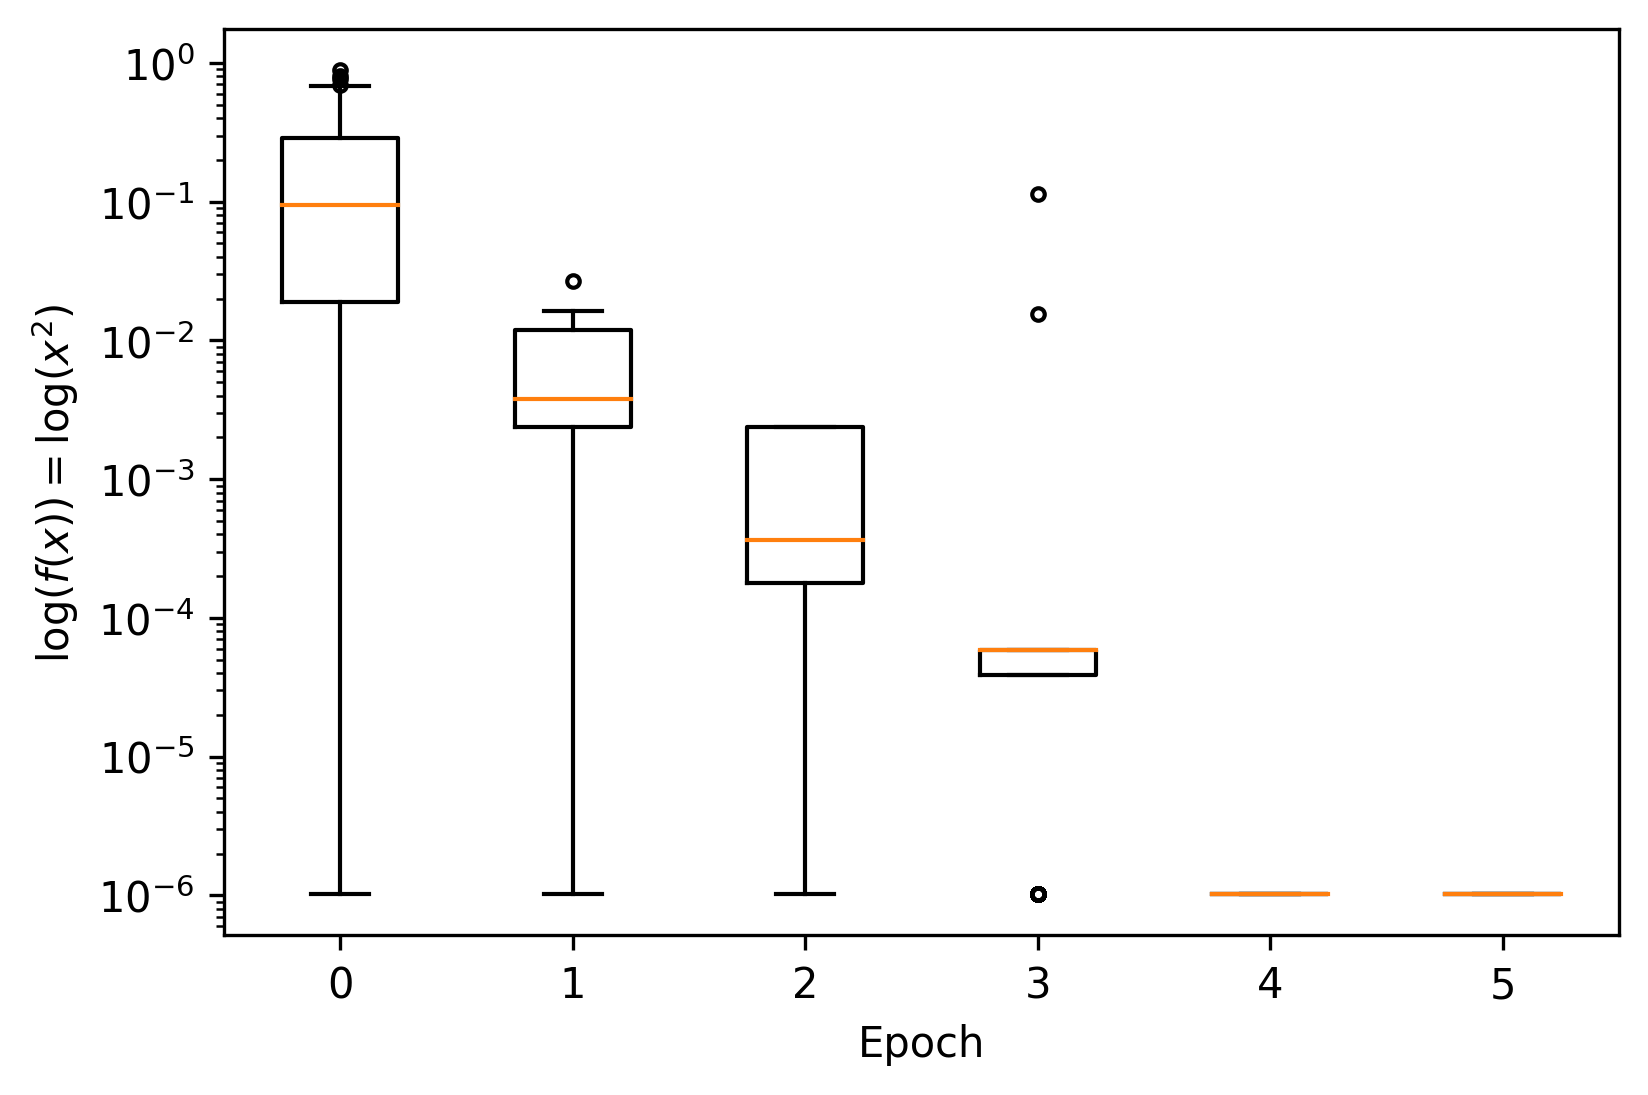

In [8]:
_, ax = plt.subplots(dpi=300)

for gen, data in fit_history.groupby("generation"):
    ax.boxplot(data["fitness"], positions=[gen], widths=0.5, sym=".")

ax.set(xlabel="Epoch", ylabel="$\log (f(x)) = \log (x^2) $", yscale="log")

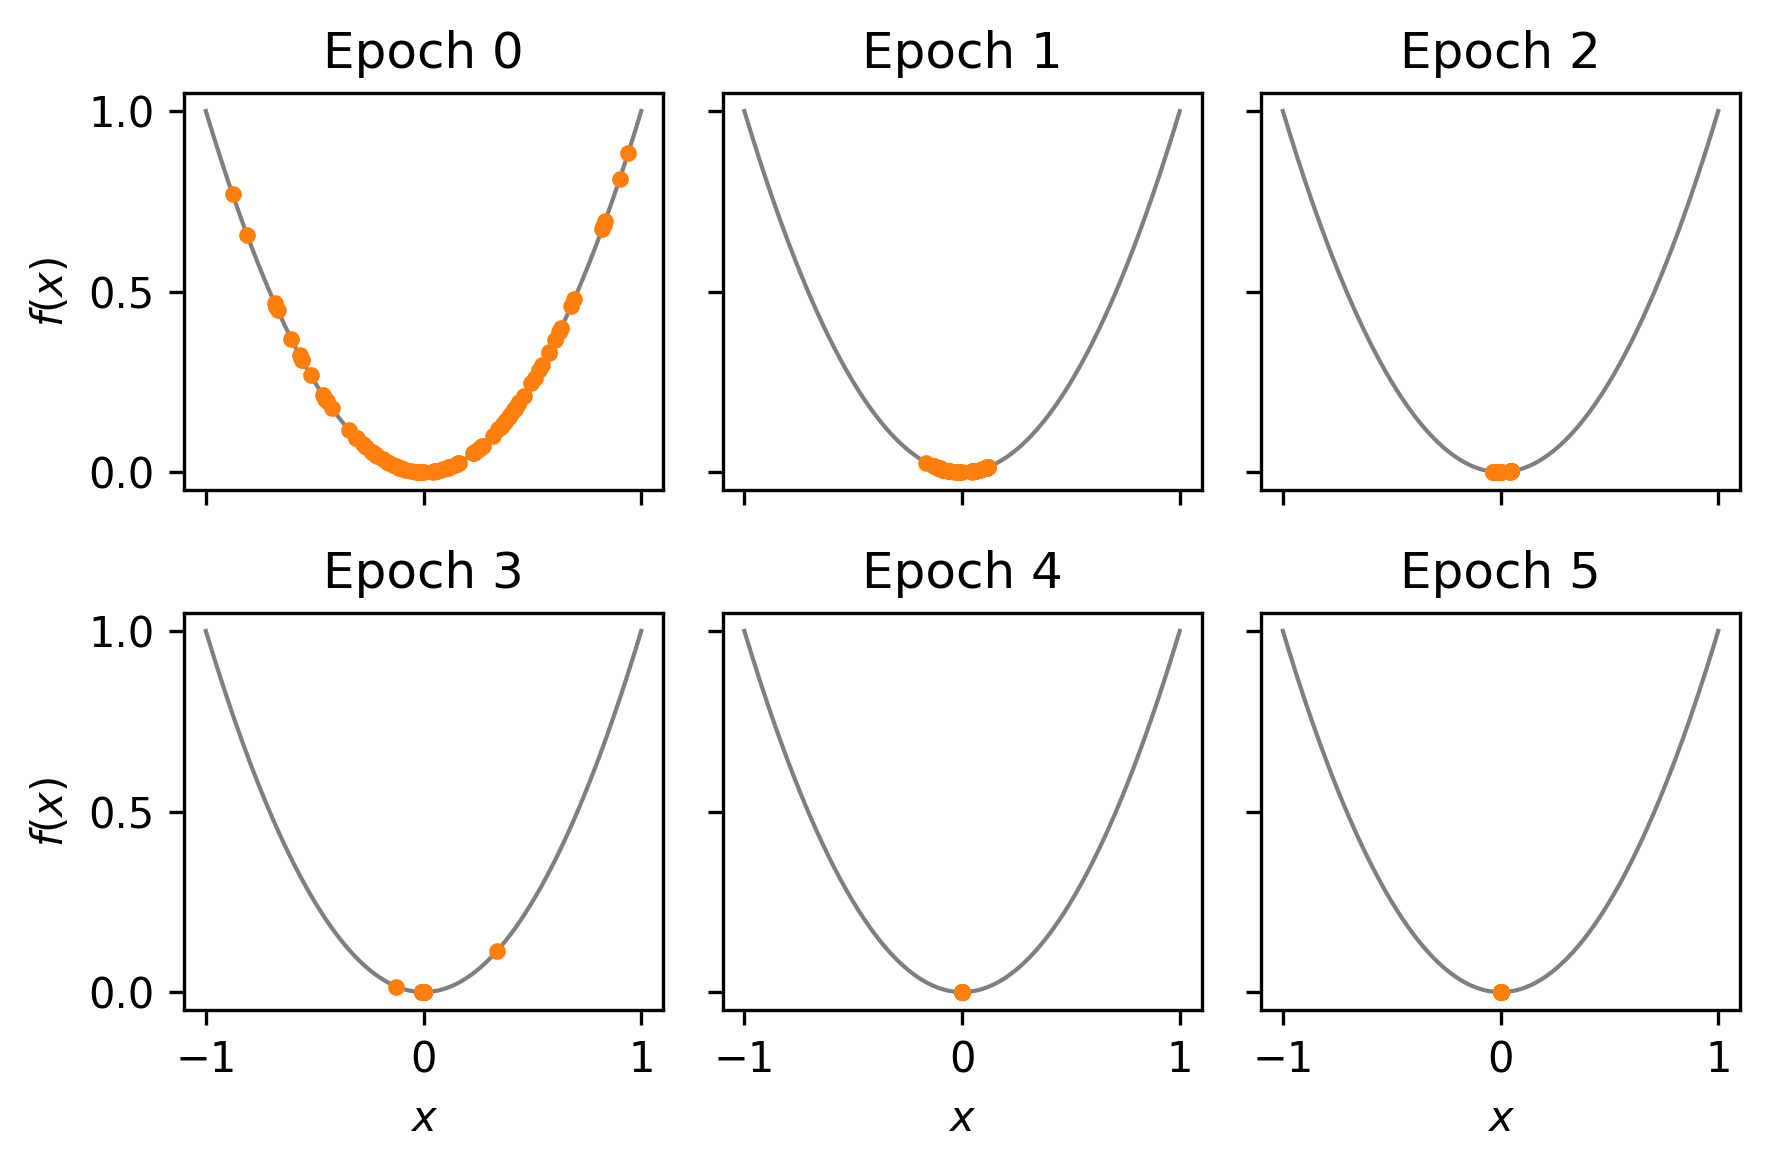

In [9]:
_, axes = plt.subplots(2, 3, dpi=300, sharex=True, sharey=True)

axes = np.reshape(axes, 6)

for i, (generation, ax) in enumerate(zip(pop_history, axes)):

    xs = np.linspace(-1, 1, 300)
    ax.plot(xs, xs ** 2, color="tab:gray", lw=1, zorder=-1)

    xs = np.array([ind.dataframe.iloc[0, 0] for ind in generation])
    ax.scatter(xs, xs ** 2, color="tab:orange", marker=".")

    xlabel = "$x$" if i > 2 else None
    ylabel = "$f(x)$" if i % 3 == 0 else None

    ax.set(title=f"Epoch {i}", xlabel=xlabel, ylabel=ylabel)

plt.tight_layout()

This looks good! The EA appears to be converging somewhere near* the optimal value.

---

\* NB: *near* could be considered a little loose but this sort of simple optimisation task is not really what ``edo`` is for.